In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42, n_clusters_per_class=1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_title(title)

In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [8]:
rf_with_replacement = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='sqrt', random_state=42)
rf_with_replacement.fit(X_train, y_train)
y_pred_rf_with_replacement = rf_with_replacement.predict(X_test)
rf_with_replacement_accuracy = accuracy_score(y_test, y_pred_rf_with_replacement)

In [9]:
rf_without_replacement = RandomForestClassifier(n_estimators=100, bootstrap=False, max_features='log2', random_state=42)
rf_without_replacement.fit(X_train, y_train)
y_pred_rf_without_replacement = rf_without_replacement.predict(X_test)
rf_without_replacement_accuracy = accuracy_score(y_test, y_pred_rf_without_replacement)

In [10]:
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest with Row Sampling (With Replacement) and Feature Sampling (Without Replacement) Accuracy: {rf_with_replacement_accuracy:.2f}")
print(f"Random Forest with Row Sampling (Without Replacement) and Feature Sampling (With Replacement) Accuracy: {rf_without_replacement_accuracy:.2f}")

Decision Tree Accuracy: 0.93
Random Forest with Row Sampling (With Replacement) and Feature Sampling (Without Replacement) Accuracy: 0.93
Random Forest with Row Sampling (Without Replacement) and Feature Sampling (With Replacement) Accuracy: 0.94


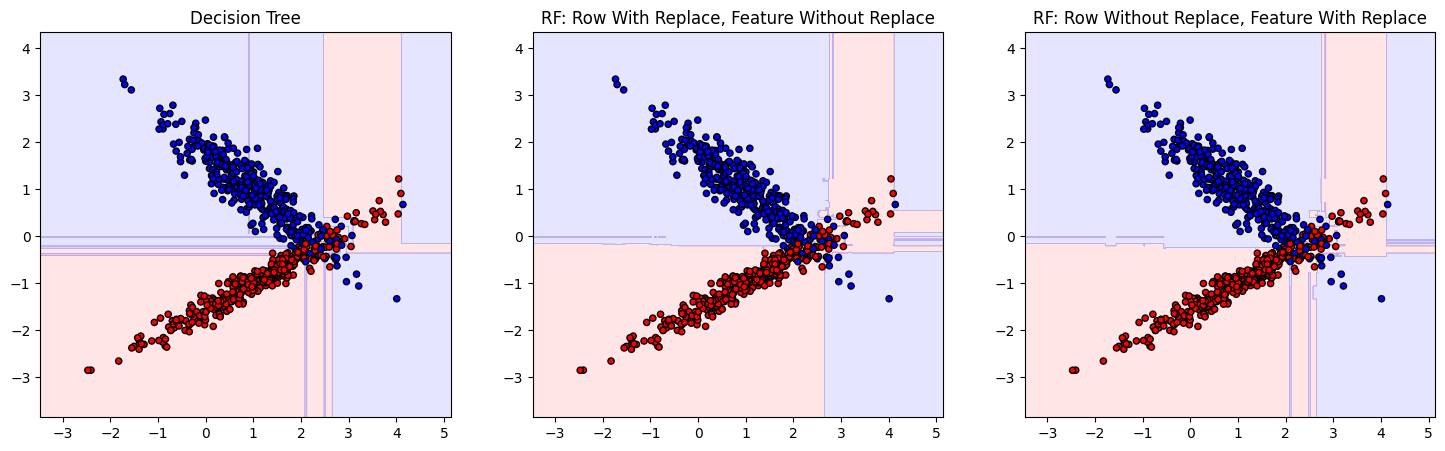

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(dt, X_train, y_train, axes[0], "Decision Tree")
plot_decision_boundary(rf_with_replacement, X_train, y_train, axes[1], "RF: Row With Replace, Feature Without Replace")
plot_decision_boundary(rf_without_replacement, X_train, y_train, axes[2], "RF: Row Without Replace, Feature With Replace")
plt.show()

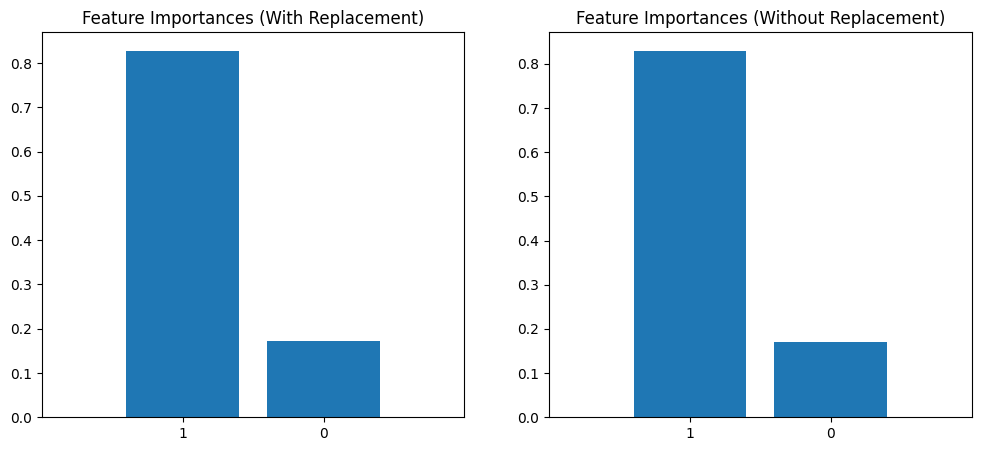

In [12]:
importances_with_replacement = rf_with_replacement.feature_importances_
importances_without_replacement = rf_without_replacement.feature_importances_

indices_with_replacement = np.argsort(importances_with_replacement)[::-1]
indices_without_replacement = np.argsort(importances_without_replacement)[::-1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Feature Importances (With Replacement)")
plt.bar(range(X.shape[1]), importances_with_replacement[indices_with_replacement], align="center")
plt.xticks(range(X.shape[1]), indices_with_replacement)
plt.xlim([-1, X.shape[1]])

plt.subplot(1, 2, 2)
plt.title("Feature Importances (Without Replacement)")
plt.bar(range(X.shape[1]), importances_without_replacement[indices_without_replacement], align="center")
plt.xticks(range(X.shape[1]), indices_without_replacement)
plt.xlim([-1, X.shape[1]])

plt.show()

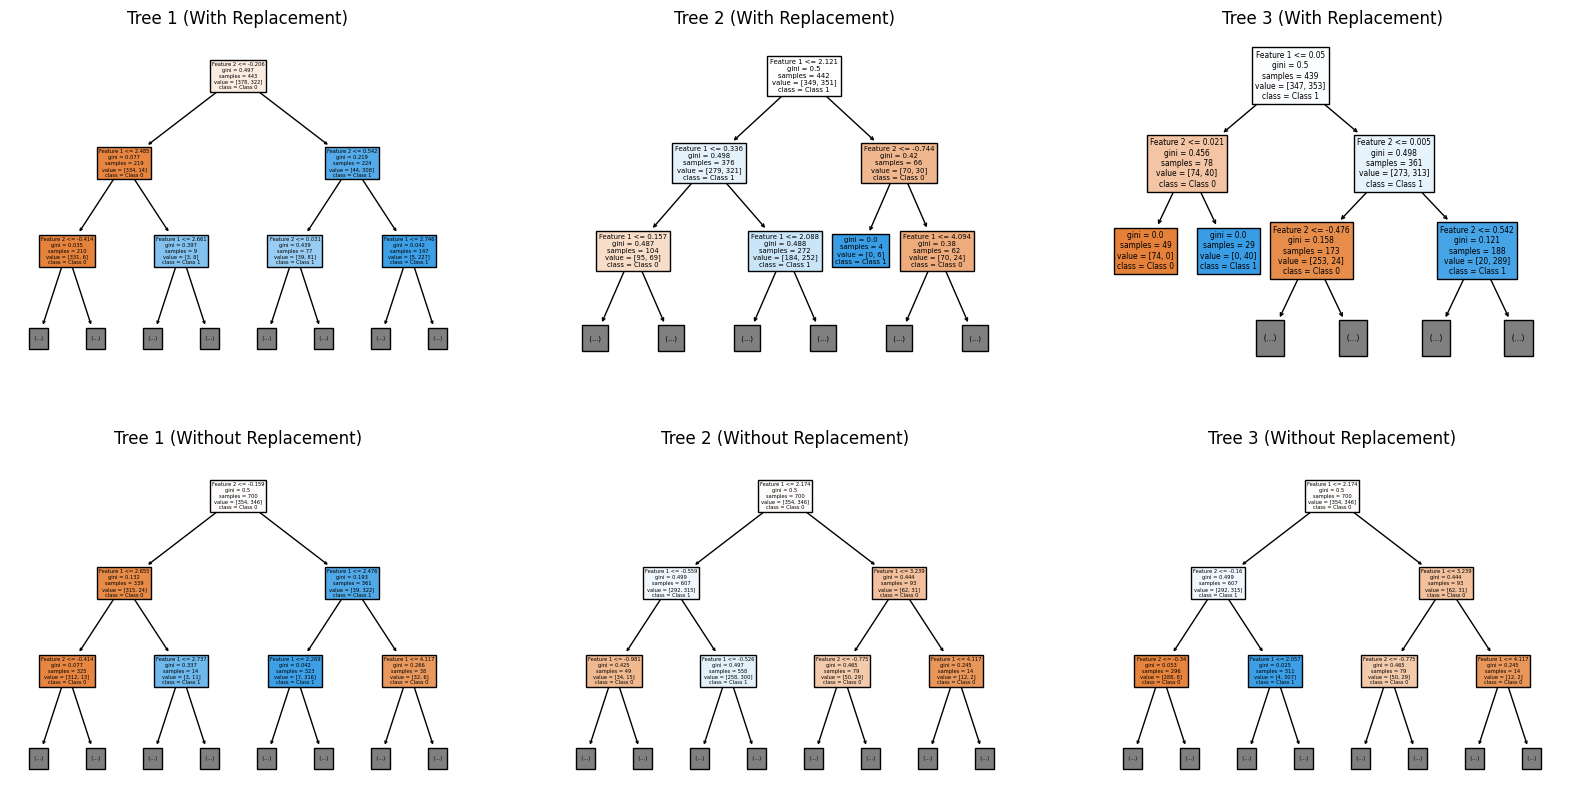

In [13]:
plt.figure(figsize=(20, 10))

for i in range(3):
    plt.subplot(2, 3, i+1)
    plot_tree(rf_with_replacement.estimators_[i], filled=True, max_depth=2, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
    plt.title(f"Tree {i+1} (With Replacement)")

for i in range(3):
    plt.subplot(2, 3, i+4)
    plot_tree(rf_without_replacement.estimators_[i], filled=True, max_depth=2, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
    plt.title(f"Tree {i+1} (Without Replacement)")

plt.show()